In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mpl_toolkits import mplot3d

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/matzim95/ML-datasets/master/wine.csv')
df.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,one
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,one
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,one


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

In [32]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [ ]:
X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
y.value_counts()

two      71
one      59
three    48
Name: Class, dtype: int64

In [64]:
columns = X.columns
columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

## Supervised learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
model = LogisticRegression(max_iter=10000, solver='saga')

In [ ]:
parameters_to_find_from = {
    'C': np.linspace(0.1, 100, 50),
    'penalty': ['l1', 'l2']
}

gs_model = GridSearchCV(model, parameters_to_find_from)
gs_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.33265306,  14.37142857,
        16.41020408,  18.44897959,  20.4877551 ,  22.52653061,
        24.56530612,  26.60408163,  28.64285714,  30.68163265,
        32.72040816,  34.75918367,  36.79795918,  38.83673469,
        40.8755102 ,  42.91428571,  44.95306122,  46.99183673,
        49.03061224,  51.06938776,  53.10816327,  55.14693878,
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ]),
                         'penalty': ['l1', 'l2']})

In [ ]:
gs_model.best_params_

{'C': 2.138775510204082, 'penalty': 'l2'}

In [ ]:
gs_model.best_score_

0.887192118226601

In [ ]:
final_model = LogisticRegression(**gs_model.best_params_, max_iter=10000, solver='saga')
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_pred_train = final_model.predict(X_train)

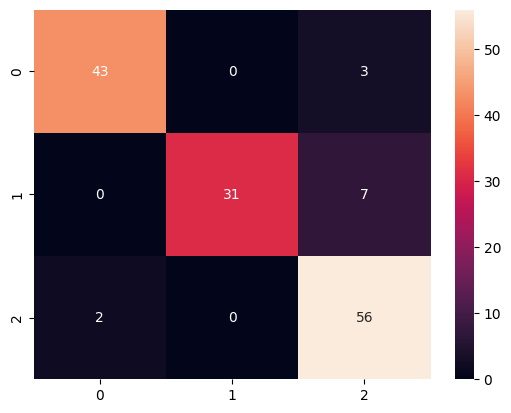

In [ ]:
cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

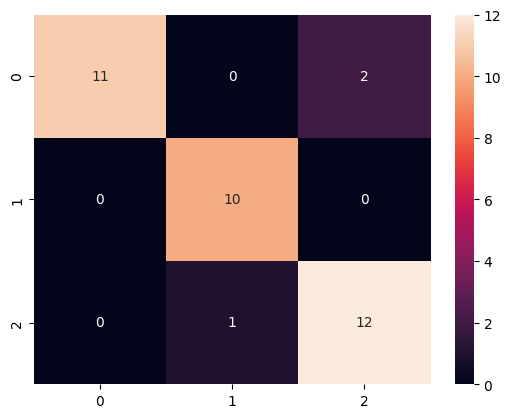

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         one       1.00      0.85      0.92        13
       three       0.91      1.00      0.95        10
         two       0.86      0.92      0.89        13

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



In [ ]:
print('f1_score_train', f1_score(y_train, y_pred_train, average='weighted'))
print('recall_score_train', recall_score(y_train, y_pred_train, average='weighted'))
print('precision_score_train', precision_score(y_train, y_pred_train, average='weighted'))
print('accuracy_score_train', accuracy_score(y_train, y_pred_train))

f1_score_train 0.9155250125560063
recall_score_train 0.9154929577464789
precision_score_train 0.9237160335751885
accuracy_score_train 0.9154929577464789


In [ ]:
print('f1_score_test', f1_score(y_test, y_pred, average='weighted'))
print('recall_score_test', recall_score(y_test, y_pred, average='weighted'))
print('precision_score_test', precision_score(y_test, y_pred, average='weighted'))
print('accuracy_score_test', accuracy_score(y_test, y_pred))

f1_score_test 0.9165564373897708
recall_score_test 0.9166666666666666
precision_score_test 0.9231601731601731
accuracy_score_test 0.9166666666666666


### NaiveBias

In [ ]:
# GausianBias

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print('f1_score_GaussianNB', f1_score(y_test, y_pred, average='weighted'))

f1_score_GaussianNB 0.9445502645502645


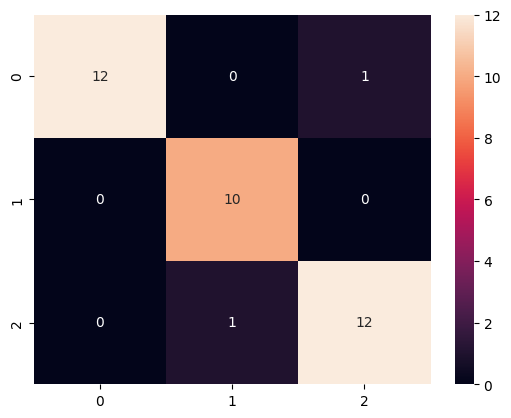

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

In [ ]:
# Multinomial NaiveBaias

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [ ]:
print('f1_score_MultinomialNB', f1_score(y_test, y_pred, average='weighted'))

f1_score_MultinomialNB 0.8074897119341563


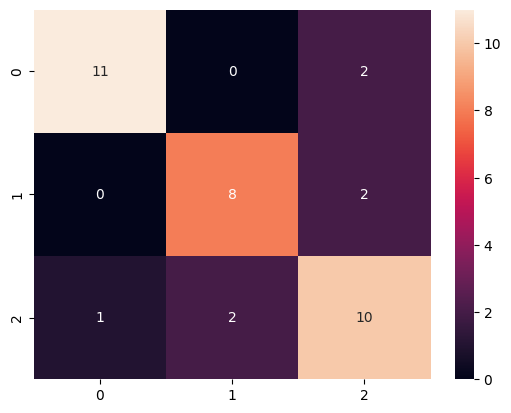

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

### Bagging

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [ ]:
bc = BaggingClassifier(base_estimator=GaussianNB())
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('f1_score_GaussianNB', f1_score(y_test, y_pred, average='weighted'))

f1_score_GaussianNB 0.9445502645502645


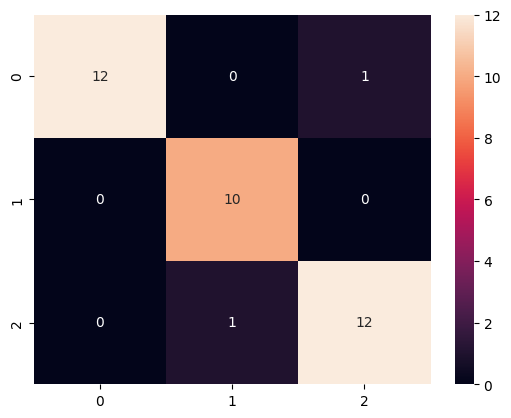

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

### Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=111)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)

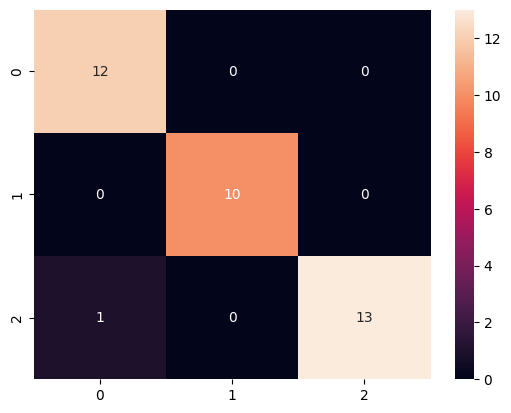

In [ ]:
cm_test = confusion_matrix(y_test, y_tree)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.show()

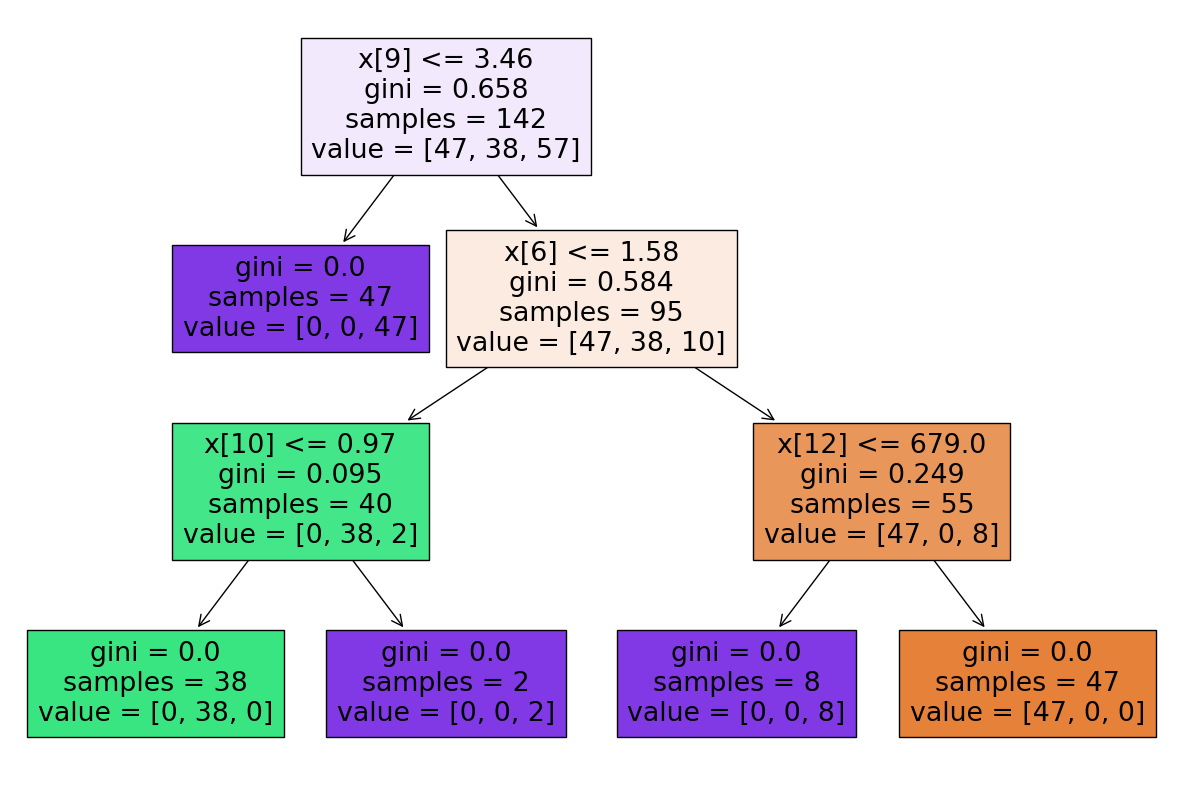

In [ ]:
fig = plt.figure(figsize = (15,10))
_ = plot_tree(tree, filled = True)

## Unsupervised learning

### KMeans

In [6]:
X.shape

(178, 13)

In [13]:
model = KMeans(n_clusters = 3, n_init='auto')
labels = model.fit_predict(X)

In [17]:
df = pd.DataFrame({'labels': labels, 'varieties' : y})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,one,three,two
labels,,,
0,0,19,50
1,46,0,1
2,13,29,20


In [ ]:
### Standarization

In [22]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
labels = model.fit_predict(X_scaled)

In [29]:
class_df = pd.DataFrame({'labels': labels, 'varieties' : y})
ct = pd.crosstab(class_df['labels'], class_df['varieties'])
ct

varieties,one,three,two
labels,,,
0,59,0,2
1,0,0,66
2,0,48,3


### PCA - Principal Component Analysis

<Axes: >

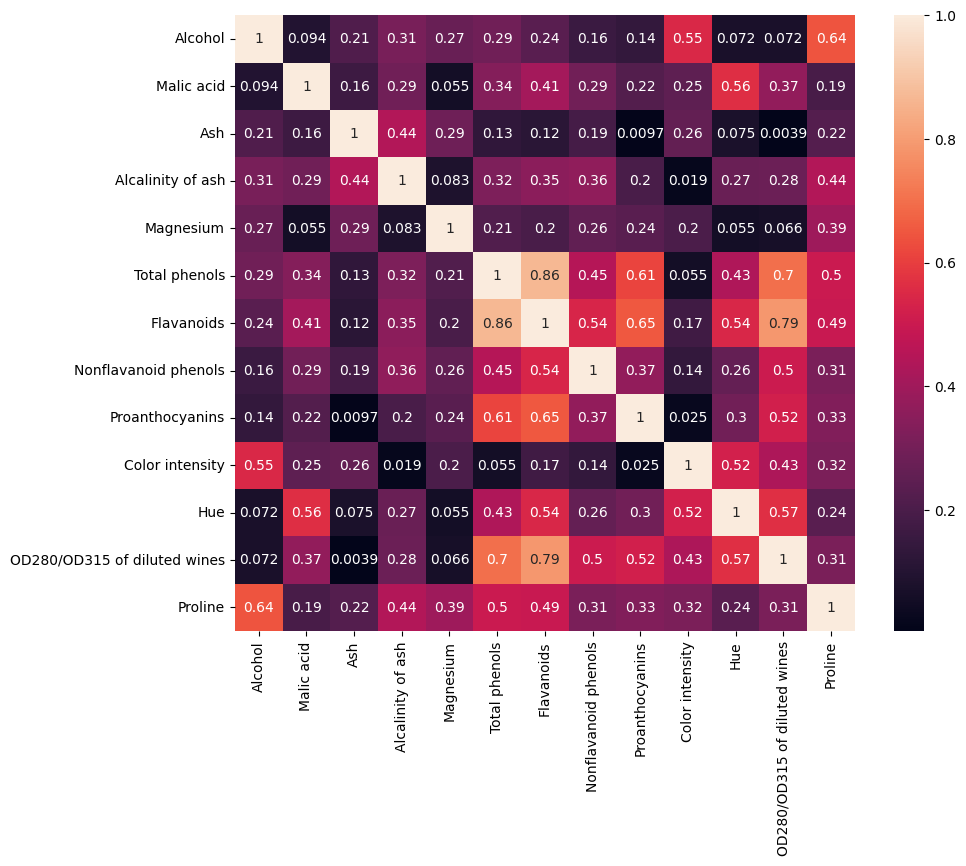

In [57]:
X_abs = np.abs(X.corr())
_, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_abs,annot=X_abs)

In [84]:
scaler = StandardScaler()
pca_model = PCA()
pipeline = make_pipeline(scaler, pca_model)
pca_features = pd.DataFrame(pipeline.fit_transform(X))

<Axes: >

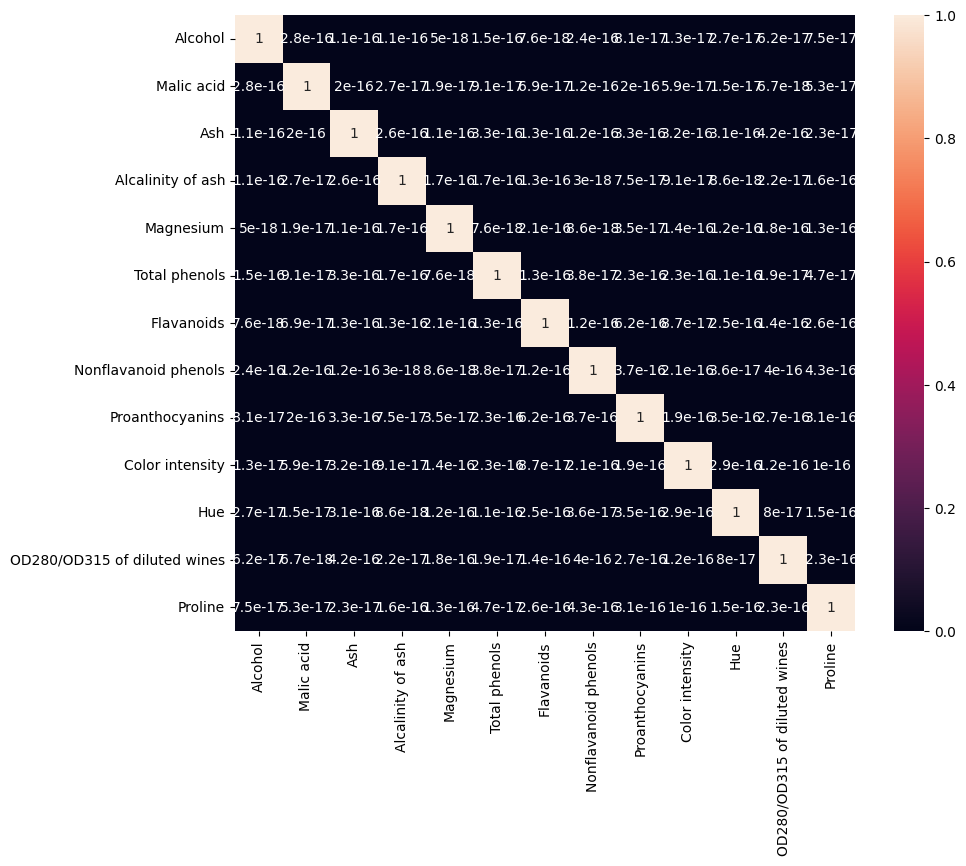

In [85]:
X_pc_abs = np.abs(pca_features.corr())
_, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_pc_abs,annot=X_pc_abs, xticklabels=columns, yticklabels=columns )

Text(0, 0.5, 'variance')

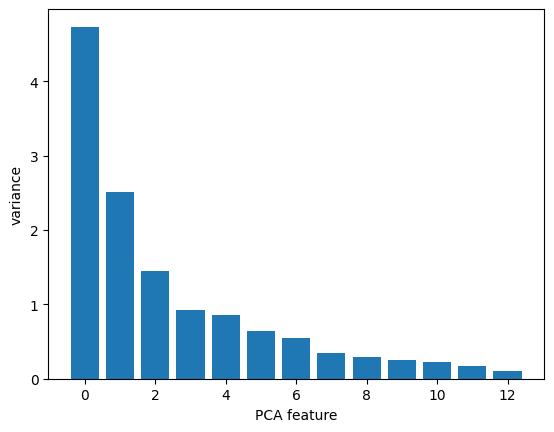

In [86]:
features = range(pca_model.n_components_)
plt.bar(features, pca_model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')

Text(0, 0.5, 'cumulative explained variance')

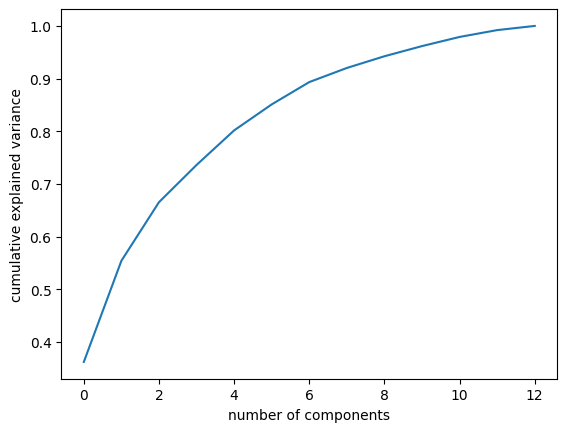

In [89]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [101]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

pca_model = PCA(n_components=3)
pca_model.fit(scaled_X)

pca_features = pca_model.transform(scaled_X)

<Axes: >

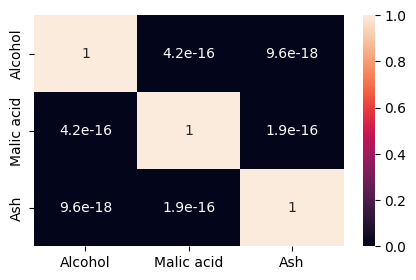

In [99]:
X_pc_abs = np.abs(pca_features.corr())
_, ax = plt.subplots(figsize=(5,3))
sns.heatmap(X_pc_abs,annot=X_pc_abs, xticklabels=columns[:pca_model.n_components_], yticklabels=columns[:pca_model.n_components_] )

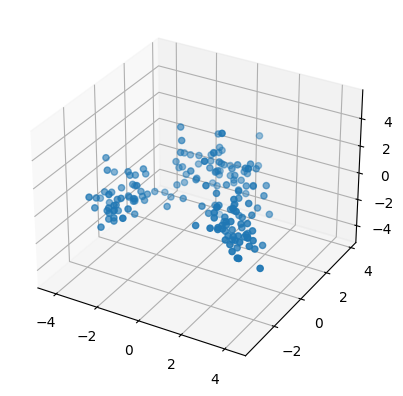

In [109]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


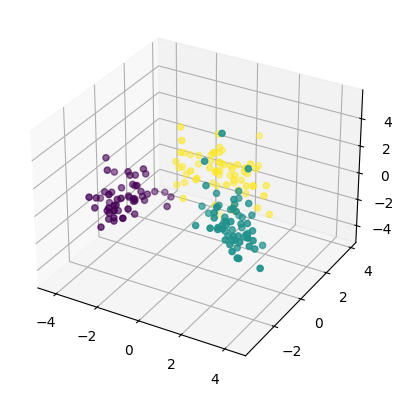

In [116]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(pca_features)
labels = kmeans_model.predict(pca_features)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2], c=labels)
plt.show()

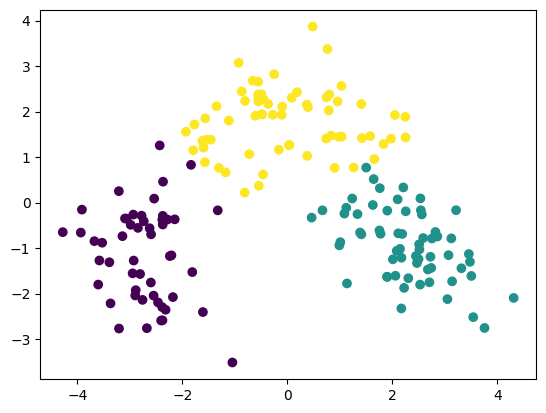

In [117]:
plt.scatter(pca_features[:,0], pca_features[:,1], c=labels)
plt.show()